In [60]:
import json
from collections import defaultdict
from sklearn import linear_model
from sklearn.metrics import precision_score
import numpy as np
import random
import gzip
import dateutil.parser
import math
import matplotlib.pyplot as plt
import string
import re
from nltk.stem.snowball import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from wordcloud import WordCloud, STOPWORDS

In [71]:
f = gzip.open("renttherunway_final_data.json.gz")
dataset = []
for l in f:
    dataset.append(json.loads(l))

In [72]:
len(dataset)

192544

In [73]:
dataset[0]

{'fit': 'fit',
 'user_id': '420272',
 'bust size': '34d',
 'item_id': '2260466',
 'weight': '137lbs',
 'rating': '10',
 'rented for': 'vacation',
 'review_text': "An adorable romper! Belt and zipper were a little hard to navigate in a full day of wear/bathroom use, but that's to be expected. Wish it had pockets, but other than that-- absolutely perfect! I got a million compliments.",
 'body type': 'hourglass',
 'review_summary': 'So many compliments!',
 'category': 'romper',
 'height': '5\' 8"',
 'size': 14,
 'age': '28',
 'review_date': 'April 20, 2016'}

## Data Cleaning

In [74]:
data = dataset

In [75]:
# Drop all ratings having null values
data = [d for d in dataset if d['rating'] != None]
print(len(data), len(dataset))

192462 192544


In [76]:
# Drop all 'age' having null values
data = [d for d in data if 'age' in d]
print(len(data), len(dataset))

191503 192544


In [77]:
# Drop all 'weight' having null values
data = [d for d in data if 'weight' in d]
print(len(data), len(dataset))

162153 192544


In [78]:
# Drop all 'height' having null values
data = [d for d in data if 'height' in d]
print(len(data), len(dataset))

161716 192544


In [79]:
for d in data:
    # Convert 'rating' from string to int and change from 2,4,6,8,10 to 1,2,3,4,5
    d['rating'] = int(d['rating']) // 2
    # Convert 'age' from string to int
    d['age'] = int(d['age'])
    # Drop 'lbs' unit and convert 'weight' from str to int
    d['weight'] = int(d['weight'][:-3])
    # Drop unit and convert 'height' from str to int
    feet,inch = re.findall(r'\d+', d['height'])
    d['height'] = int(feet) * 12 + int(inch)

In [80]:
# Pre-processing 'review_text' by ignoring capitalization and removing punctuation
sp = set(string.punctuation)
def cleanText(text):
    text = ''.join([c for c in text.lower() if not c in sp])
    return text

In [81]:
data[68]

{'fit': 'fit',
 'user_id': '321791',
 'bust size': '36d',
 'item_id': '131533',
 'weight': 180,
 'rating': 5,
 'rented for': 'wedding',
 'review_text': "Loved this dress! Received compliments on it all night and felt great. When I rented they only had the long left so I just hemmed it with hem tape since I was wearing Toms. Only problem was that the zipper was extremely difficult to get up and down where the middle section comes together in the back. My fiancé had to use pliers and even then it took a lot of work. It was a little tight in the chest area (I'm a 36DD) but not too bad. Sad to see this dress go back! ",
 'body type': 'hourglass',
 'review_summary': 'Receiving so many compliments!',
 'category': 'gown',
 'height': 65,
 'size': 21,
 'age': 27,
 'review_date': 'June 15, 2014'}

In [82]:
print(len(data), len(dataset)) 

161716 192544


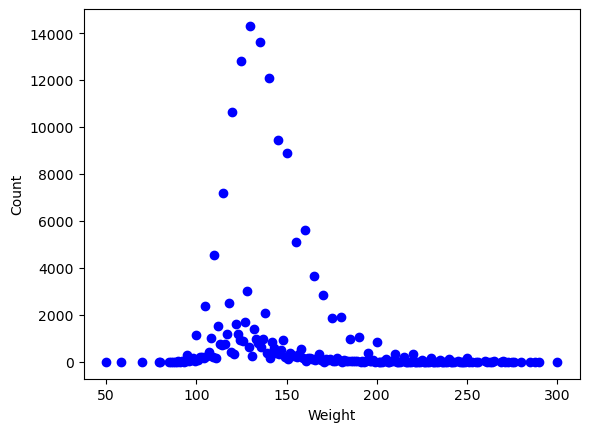

In [24]:
# Weight Values
weight = defaultdict(int)

for d in data:
    weight[d['weight']] += 1

x = weight.keys()
y = weight.values()   

plt.scatter(x, y, color='blue')
plt.ylabel("Count")
plt.xlabel("Weight")
plt.show()

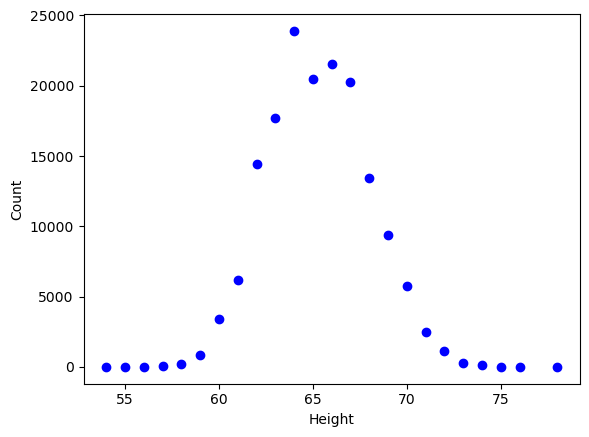

In [83]:
# Height Values
height = defaultdict(int)

for d in data:
    height[d['height']] += 1

x = height.keys()
y = height.values()   

plt.scatter(x, y, color='blue')
plt.ylabel("Count")
plt.xlabel("Height")
plt.show()

## Wordcloud

In [45]:
text = [cleanText(d['review_text']) for d in data]
random.shuffle(text)
r_text = random.sample(text, 10000)

In [47]:
wc = ' '
for w in r_text:
    wc += w

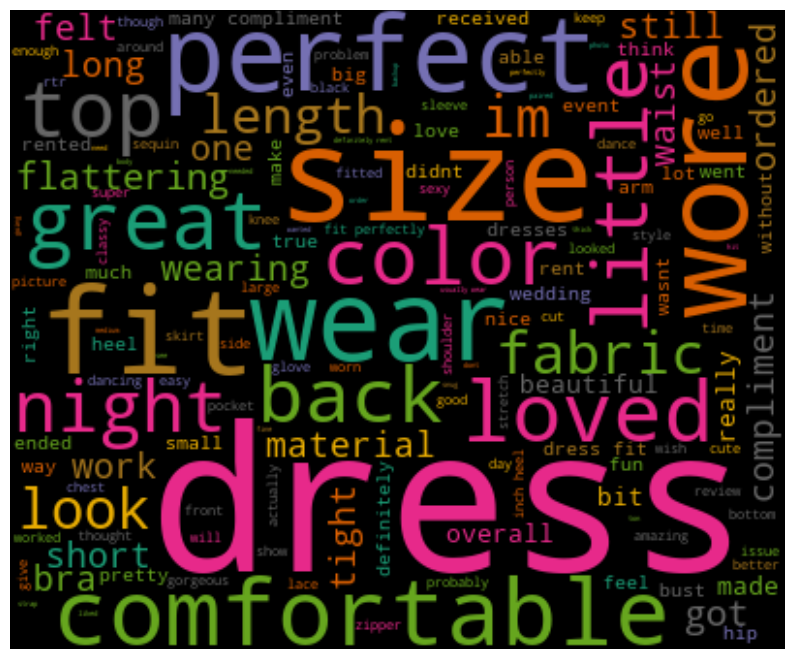

In [49]:
wordcloud = WordCloud(width=400, height=330, stopwords = set(STOPWORDS), max_words=150,colormap="Dark2").generate(wc)
fig = plt.figure(figsize=(10, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()